In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sbn
from scipy.optimize import fmin

Note: this post has been updated for newer versions of python.  Content-wise it is mostly identical to the earlier version except for some minor editorial changes.  You can interact with this post [live on Google Colab](https://colab.research.google.com/drive/1qJKw_LPo1Dmykye3PJm3qgixHtDXr4Aq?usp=sharing).

## Fisheries Simulation Model

In this notebook, we examine the workings of the Gordon-Schaefer Fisheries Model for a single species.

Denoting $S(t)$ as the stock at time $t$, we can write the population growth function as

$$\frac{\Delta S}{\Delta t} = \frac{\partial S}{\partial t} = r S(t) \left(1- \frac{S(t)}{K} \right)$$

where  
$S(t)$ = stock size at time $t$  
$K$ = carrying capacity  
$r$ = intrinsic growth rate of the population

<!--TEASER_END-->

Notice that growth $\left(\frac{\partial S}{\partial t}\right)$ is stock dependent:

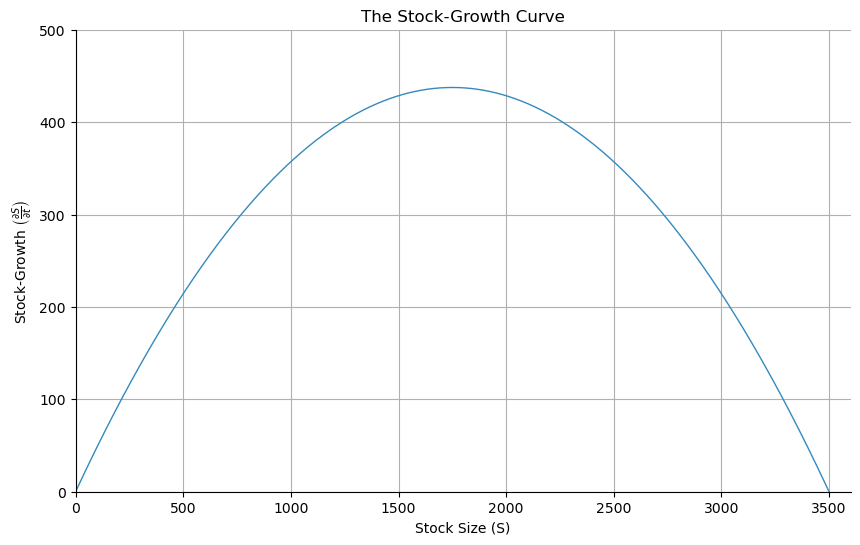

In [2]:
r = .5
K = 3500

# generate all possible values of stocks
# in increments of 1
S=np.arange(1,K + 1).reshape((K,1))

# find growth for each stock size
dSdt = r * S * ( 1- S / K)

# plot growth as a function of stock
fig, ax = plt.subplots(1,1, figsize=(10, 6))
lw = 1
ax.plot(S,dSdt,lw=lw, c="#348ABD")
ax.set_xlabel(r'Stock Size (S)')
ax.set_ylabel(r"Stock-Growth $\left(\frac{\partial S}{\partial t}\right)$")
ax.set_xlim(0,3600)
ax.set_ylim(0,500)
plt.title("The Stock-Growth Curve")
sbn.despine()
plt.grid()

When stock size is low, the growth in stocks is also low.  Despite there being lots of ecological resources to support stock growth (since there is relatively little competition due to the low stock size) the growth is small since there isn't enough biomass to lead to the fastest growth.  Conversely, when stocks are high (near $K=3500$), ecological constraints make fast growing populations unviable despite there being large numbers of individuals capable of creating new biomass.

We could also look at this from the standpoint of how the Stock ($S(t)$) and the growth in stocks $\left(\frac{\partial S}{\partial t}\right)$ would evolve through time if there was not fishing harvest.  We begin with a low value of stocks, and allow the stock to grow for 50 periods.

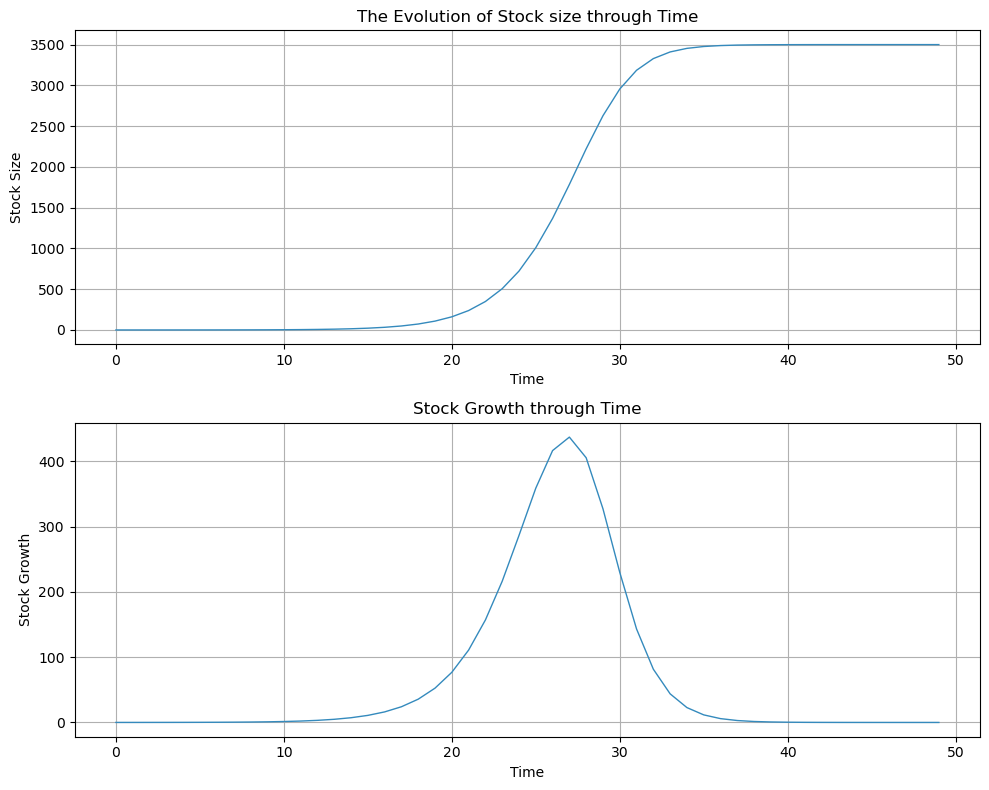

In [3]:
time_horizon = 50
hold_stocks = np.zeros((time_horizon,1))
hold_growth = np.zeros((time_horizon,1))
count = 0
hold_stocks[0] = .05
for t in np.arange(1,time_horizon):
    hold_growth[count] = r * hold_stocks[count] * (1 - hold_stocks[count]/K)
    hold_stocks[count+1] = hold_stocks[count] + hold_growth[count]
    count = count + 1

# plot evolution of stocks as a function of time
plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(np.arange(time_horizon),hold_stocks,lw=lw, c="#348ABD")
plt.xlabel("Time")
plt.ylabel("Stock Size")
plt.grid()
plt.title("The Evolution of Stock size through Time")

# plot evolution of growth as a function of time
plt.subplot(2,1,2)
plt.plot(np.arange(time_horizon),hold_growth,lw=lw, c="#348ABD")
plt.xlabel("Time")
plt.ylabel("Stock Growth")
plt.title("Stock Growth through Time")
plt.tight_layout()
plt.grid()

Suppose now we have harvest.  Harvest can be produced by fishermen by using the input effort ($E(t)$) which is chosen each time period.  The harvest production function is:  

$$
H(t) = \alpha S(t) E(t)
$$

where $\alpha$ is the fraction of the population $S(t)$ that can be barvested with a unit of effort $E(t)$.  $\alpha$ is sometimes termed the catchability coefficient.

To incorporate harvest, redefine the population growth function as

$$
\begin{align}
\frac{\Delta S}{\Delta t} &= \frac{\partial S}{\partial t}  - H(t) \\
                          & = r S(t) \left(1- \frac{S(t)}{K} \right) - H(t)  
\end{align}
$$

Since at steady state growth must be zero, this implies that $$\frac{\partial S}{\partial t} = H(t)$, or

$$
r S(t) \left(1- \frac{S(t)}{K} \right) = \alpha S(t) E(t) 
$$

The expression above tells us that at the equilibrium, the fisherman's optimal effort choice must ensure a steady state (harvest equals growth), which occurs at effort level

$$
 E(t) = \frac{r S(t) \left(1- \frac{S(t)}{K} \right)}{\alpha S(t)} 
$$

With that finding, we can re-interpret the first figure above to be the Sustainable Harvest curve, since it shows for any viable stock size, that the growth of the stock must be harvested exactly, so that the population remains unchanged.  This defines the steady state.

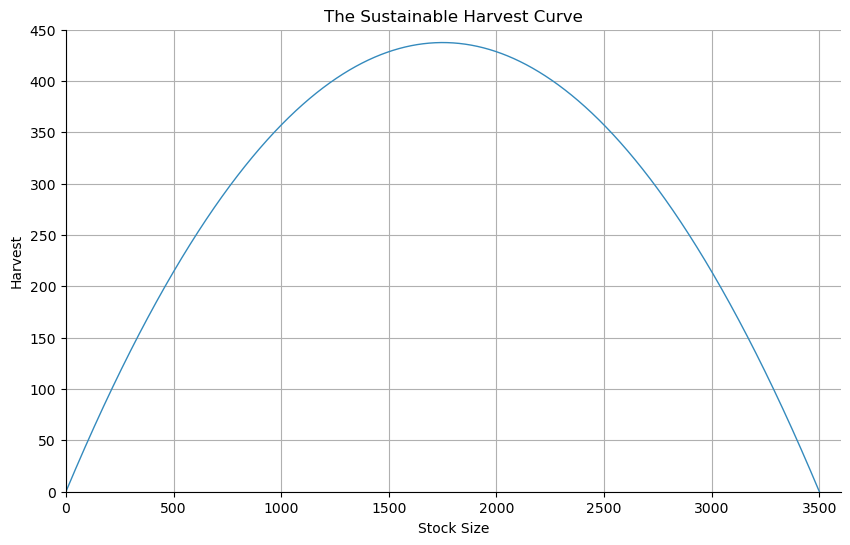

In [4]:
# plot growth as a function of stock
plt.figure(figsize=(10, 6))
plt.subplot(111)
lw = 1
plt.plot(S,dSdt,lw=lw, c="#348ABD")
plt.xlabel("Stock Size")
plt.ylabel("Harvest")
plt.title("The Sustainable Harvest Curve")
plt.xlim(0, 3600)
plt.ylim(0,450)
sbn.despine()
plt.grid()

The work above shows us that we have uniquely identified harvest and effort pairs that define the steady state equlibrium.  Consequently, we can reinterpret the sustainable harvest function to be written in terms of effort rather than stocks.

In [5]:
alpha = .001
effort_ss = (r * S * (1 - S/K))/(alpha * S)

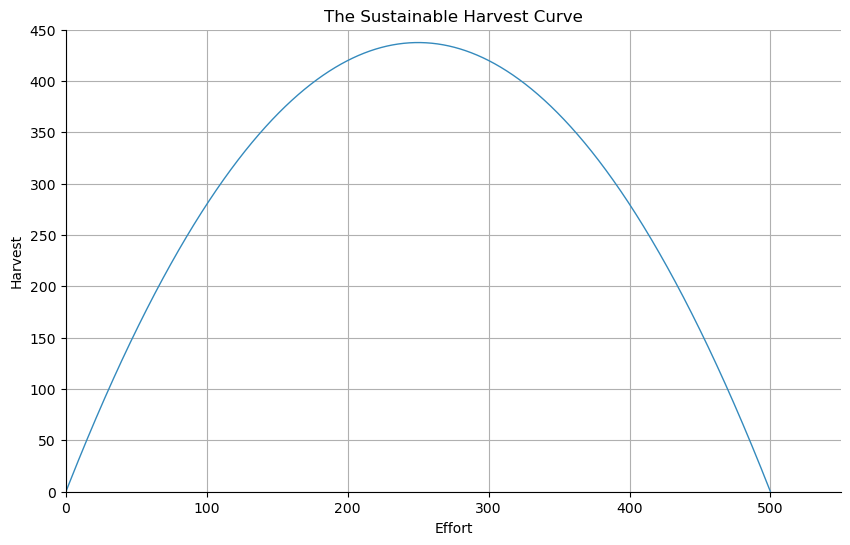

In [6]:
# plot harvest as a function of stocks
plt.figure(figsize=(10, 6))
plt.subplot(111)
lw = 1
plt.plot(effort_ss,dSdt,lw=lw, c="#348ABD")
plt.xlabel("Effort")
plt.ylabel("Harvest")
plt.title("The Sustainable Harvest Curve")
plt.xlim(0,550)
plt.ylim(0,450)
sbn.despine()
plt.grid()

An important feature of the above chart is that for each level of effort, there is a corresponding equilibrium stock.  These stock effort pairs ensure that for the effort level put in, that harvest will only be exactly equal to the growth in the stock for that period.

In equilibrium, these pairs $[E(t),S(t)] $ are negatively correlated: high effort is matched to low stocks and low effort is paired with high stocks:

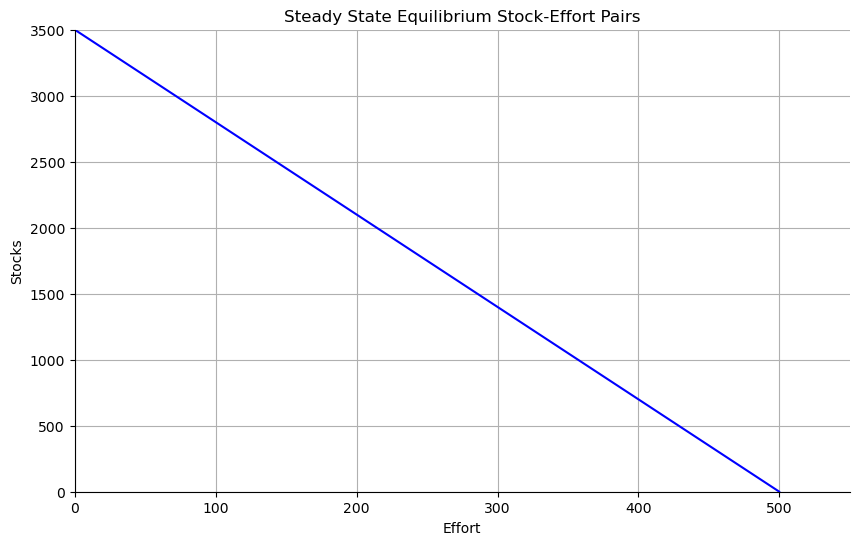

In [7]:
plt.figure(figsize=(10, 6))
plt.subplot(111)
plt.plot(effort_ss,S,c="b")
plt.xlabel("Effort")
plt.ylabel("Stocks")
plt.xlim(0,550)
plt.ylim(0,3500)
plt.title("Steady State Equilibrium Stock-Effort Pairs")
sbn.despine()
plt.grid()

With the sustainable harvest curve defined in terms of effort, we only need a couple of more steps to complete our characterization of the open access fishery.  We need to

1.  Multiply the sustainable harvest curve times price to construct the sustainable total revenue curve
2.  Include the total cost function

Define total revenues as price times harvest: 
$$
TR = p H(t)
$$

Since fishermen will also consider the costs of effort when making optimal choices, define total costs as
$$
TC = c E(t)
$$

where $c$ is cost per unit of effort.

The diagram below shows the **steady state** total revenue and total cost curves and makes explicit the pairing of steady state effort and stock levels that are sustainable:

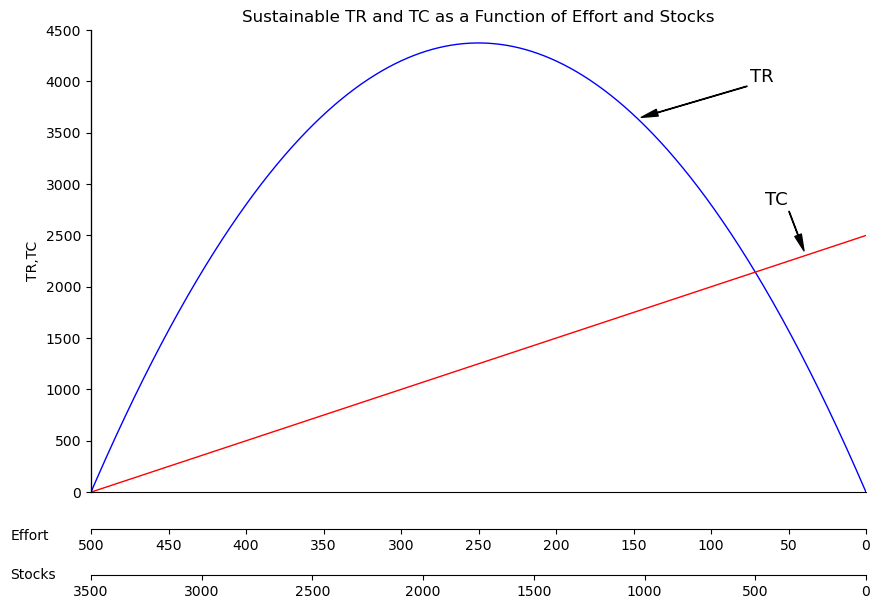

In [8]:
p = 10
c = 5

# for each effort level, calculate
# 1. Sustainable TR = p H
# 2. TC

TR_ss = dSdt * p
TC = effort_ss * c


fix, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1.plot(effort_ss,TR_ss,lw=lw, c="b")
ax1.plot(effort_ss,TC,lw=lw,c='r')
ax1.set_ylabel("TR,TC")
ax1.set_title("Sustainable TR and TC as a Function of Effort and Stocks")
ax1.annotate('TR', xy=(355, 3650), xytext=(425, 4000),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)
ax1.annotate('TC', xy=(460, 2350), xytext=(435, 2800),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)

# turn off x axis
# set the x-spine at zero
ax1.spines['bottom'].set_position('zero')
# we just want a line for the bottom spine/axis
ax1.set_xticks([])
ax1.set_xticklabels([])


# Secondary X-axis
ax2 = ax1.twiny()
## Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.08))
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")

# set effort ranges and reverse
ax2.set_xticks(range(0,550,50))
ax2.set_xticklabels(reversed(range(0,550,50)))


# third axis for stocks
ax3=ax1.twiny()
## Offset the twin axis below the host
ax3.spines["bottom"].set_position(("axes", -0.18))
ax3.xaxis.set_ticks_position("bottom")
ax3.xaxis.set_label_position("bottom")
# set stock ranges and reverse
ax3.set_xticks(range(0,3600,500))
ax3.set_xticklabels(reversed(range(0,3600,500)))

ax1.set_xlim(0,500)
ax1.set_ylim(0,4500)

plt.figtext(.045, .03, 'Effort')
plt.figtext(.044, -.035, 'Stocks')

sbn.despine()
plt.show()

In what follows, we do not draw the secondary x axis showing how there is a corresponding stock size for each effort level, but it is implicit in all of the steady state analysis we perform below.


## The Open Access Equilibrium

For an open access fishery, effort can't be optimized for profits.  Fishermen will either enter the fishery or if already in the fishery will increase effort in an attempt to capture a larger share of the catch if they observe positive profits.  In reality, this means that some vessels might be profitable and others won't be.  The profits for the average vessel (or the total profits in the fishery) in the fishery will be zero.

Consequently, at the open access Equilibrium, $TR = TC$.  This means that

$$TR -TC = pH(t) - cE(t) = p \alpha S(t) E(t) - c E(t) = 0$$

which implies that 

$$p \alpha S(t) - c =0$$

Therefore, at steady state in an open access equilibrium, stocks are

$$S^{OA} = \frac{c}{p\alpha}$$

Given $S^{OA} $ we can solve for steady state effort in an open access fishery
$$E^{OA} = \frac{r S^{OA} \left(1- \frac{S^{OA}}{K} \right)}{\alpha S^{OA}} $$

In [9]:
soa = c/(p*alpha)
print("Open Access Equilibrium Stock Size is: ", soa)
eoa = r*soa*(1-(soa/K))/(alpha*soa)
print("Open Access Equilibrium Effort is: ", round(eoa,1))
revs_oa = p*alpha*soa*eoa
cost_oa = c*eoa
profits_oa = revs_oa - cost_oa
print("Open Access Profits is: ", round(profits_oa, 1))

Open Access Equilibrium Stock Size is:  500.0
Open Access Equilibrium Effort is:  428.6
Open Access Profits is:  0.0


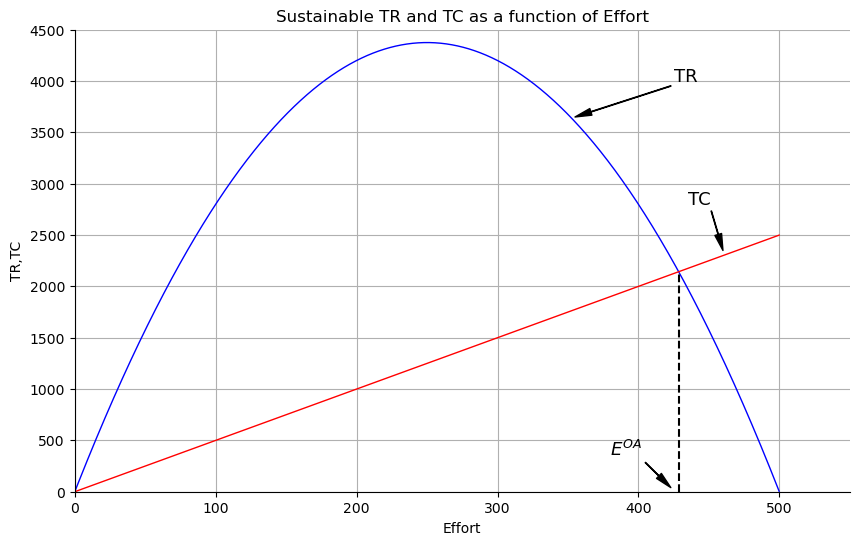

In [10]:
plt.figure(figsize=(10, 6))
plt.subplot(111)
plt.plot(effort_ss,TR_ss,c="b")
plt.plot(effort_ss,TC,c='r')
plt.xlabel("Effort")
plt.ylabel("TR,TC")
plt.title("Sustainable TR and TC as a function of Effort")
plt.annotate('TR', xy=(355, 3650), xytext=(425, 4000),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)
plt.annotate('TC', xy=(460, 2350), xytext=(435, 2800),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)
plt.annotate('$E^{OA}$', xy=(423, 40), xytext=(380, 350),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)
plt.plot((eoa, eoa), (0, c*eoa), 'k--')
plt.xlim(0,550)
plt.ylim(0,4500)
sbn.despine()
plt.grid()

## Profit Maximizing Effort

Optimal Equilibrium effort maximizes profits, or the distance between TR and TC.  This occurs where
$$
\frac{\partial (TR - TC)}{\partial E} = p\alpha \frac{\partial S(t)}{\partial E} - c = 0
$$
This is a bit complicated, so we will solve for this numerically.

> Note: there is no maximize function so we will minimize negative profits (thereby maximizing profits)

In [11]:
# negative profit function
negative_profits = lambda s : -1*((p*alpha*s - c) * (r*s*(1-(s/K)))/(alpha*s))

S_initial_guess = 3000
S_star = fmin(negative_profits, S_initial_guess)
print("Profit Maximizing Steady State Stocks (S*): ", S_star[0].round(2))
E_star = r*S_star*(1-(S_star/K))/(alpha*S_star)
print("Profit Maximizing Effort (E*) is", E_star[0].round(2))
revs_star = p*alpha*S_star*E_star
print("Total Revenues at E* is", revs_star[0].round(2))
cost_star = c*E_star
print("Total Costs at E* is",cost_star[0].round(2))
profits_star = revs_star - cost_star
print("Profits at E* is ", profits_star[0].round(2))

Optimization terminated successfully.
         Current function value: -3214.285714
         Iterations: 26
         Function evaluations: 52
Profit Maximizing Steady State Stocks (S*):  2000.0
Profit Maximizing Effort (E*) is 214.29
Total Revenues at E* is 4285.71
Total Costs at E* is 1071.43
Profits at E* is  3214.29


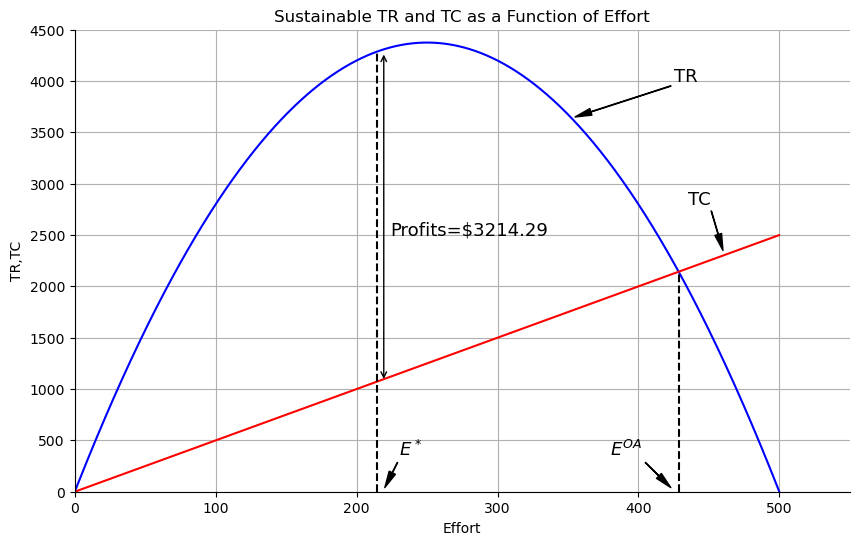

In [12]:
plt.figure(figsize=(10, 6))
plt.subplot(111)
plt.plot(effort_ss,TR_ss,c="b")
plt.plot(effort_ss,TC,c='r')
plt.xlabel("Effort")
plt.ylabel("TR,TC")
plt.title("Sustainable TR and TC as a Function of Effort")
plt.annotate('TR', xy=(355, 3650), xytext=(425, 4000),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)
plt.annotate('TC', xy=(460, 2350), xytext=(435, 2800),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)

plt.annotate('$E^*$', xy=(220, 40), xytext=(230, 350),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)

plt.annotate('$E^{OA}$', xy=(423, 40), xytext=(380, 350),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)

plt.plot((E_star[0], E_star[0]), (0, revs_star[0]), 'k--')
plt.plot((eoa, eoa), (0, c*eoa), 'k--')
plt.annotate(
    '', xy=(E_star+5, revs_star), xycoords='data',
    xytext=(E_star+5, cost_star), textcoords='data',
    arrowprops={'arrowstyle': '<->'})
plt.annotate(
    'Profits=$%s'%(str(np.around(profits_star[0],2))), xy=(E_star+5, 2500), xycoords='data',
    xytext=(5, 0), textcoords='offset points',fontsize=13)
plt.xlim(0,550)
plt.ylim(0,4500)
sbn.despine()
plt.grid()

The solution above may point out what is optimal effort ($E^*$), but unless the common property open access problem is addressed via policy it isn't achievable. 

### Question 1.  When is MSY profit maximizing?

Before answering this question, we need to calculate/define MSY.  MSY is the maximum sustainable yield and is the maximum growth the stock can produce. This is the top of the hump in the Stock-Growth figure at the top of this worksheet.  At this point, growth is maximized.

We will solve for $S^{MSY}$ numerically.

In [13]:
negative_stock_growth = lambda s : -1*(r*s*(1-(s/K)))

S_initial_guess = 1750
S_msy = fmin(negative_stock_growth, S_initial_guess)
print("Maximum Sustainable Yield Stock Size is: ", S_msy[0].round(2))
E_msy = r*S_msy*(1-(S_msy/K))/(alpha*S_msy)
print("Effort at MSY (E_MSY) is", E_msy[0].round(2))
revs_msy = p*alpha*S_msy*E_msy
print("Total Revenues at $E_MSY$ is", revs_msy[0].round(2))
cost_msy = c*E_msy
print("Total Costs at E_MSY$ is",cost_msy[0].round(2))
profits_msy = revs_msy - cost_msy
print("Profits at E_MSY is", profits_msy[0].round(2))

Optimization terminated successfully.
         Current function value: -437.500000
         Iterations: 21
         Function evaluations: 42
Maximum Sustainable Yield Stock Size is:  1750.0
Effort at MSY (E_MSY) is 250.0
Total Revenues at $E_MSY$ is 4375.0
Total Costs at E_MSY$ is 1250.0
Profits at E_MSY is 3125.0


The profit maximizing solution maximizes the distance between $TR$ and $TC$.  At this point, notice that the slope of the red line and blue line are equal.  This occurs because the optimal solution requires that marginal revenue ($\frac{\partial TR}{\partial E}$) must equal marginal cost ($\frac{\partial TC}{\partial E}$). At profit maximizing effort ($E^*$), if effort is increased, total revenues increase but slower than total costs.  So for each additional unit of effort beyond profit maximizing effort, an addition unit of effort costs more than it brings in revenues.  Notice that at Maximum Sustainable Yield (MSY), the slope of sustainable total revenue curve is zero:

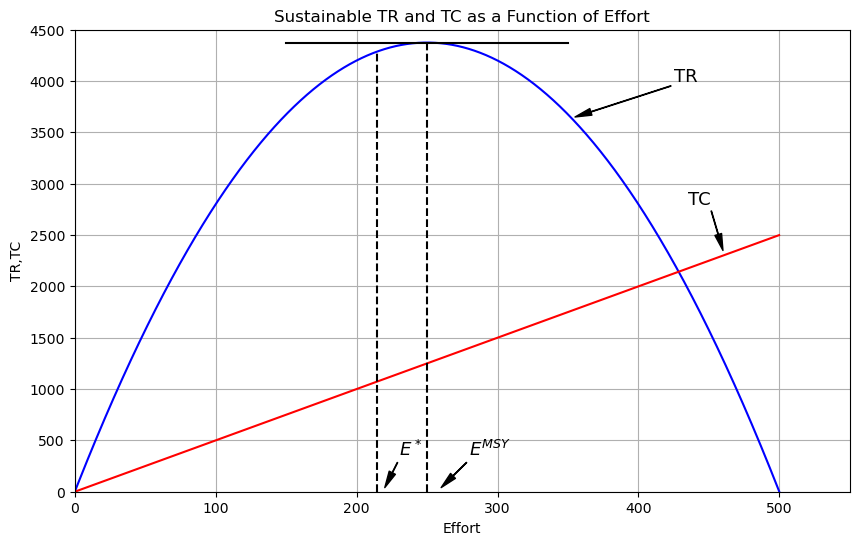

In [20]:
plt.figure(figsize=(10, 6))
plt.subplot(111)
plt.plot(effort_ss,TR_ss,c="b")
plt.plot(effort_ss,TC,c='r')
plt.xlabel("Effort")
plt.ylabel("TR,TC")
plt.title("Sustainable TR and TC as a Function of Effort")
plt.annotate('TR', xy=(355, 3650), xytext=(425, 4000),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)
plt.annotate('TC', xy=(460, 2350), xytext=(435, 2800),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)

plt.annotate('$E^*$', xy=(220, 40), xytext=(230, 350),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)

plt.plot((E_star, E_star), (0, revs_star), 'k--')

plt.annotate('$E^{MSY}$', xy=(260, 40), xytext=(280, 350),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)
plt.plot((E_msy[0], E_msy[0]), (0, revs_msy[0]), 'k--')
plt.plot((E_msy[0]-100,E_msy[0]+100),(revs_msy[0],revs_msy[0]),'k-',lw=1.5)
plt.xlim(0,550)
plt.ylim(0,4500)
plt.grid()

The profit maximizing solution requires the slope of the red and blue lines to be equal. At $E^{MSY}$, this can only happen if $c=0$, or if the cost of fishing is free.  As long as $c>0$, the profit maximizing solution calls for reducing effort below $E^{MSY}$.  This also leads to a **higher** stock size.

### Question 2.  How does technical change impact the analysis?

We typically associate technical change with making production more efficient.  Examining our harvest production function we see that
$$H(t) = \alpha S(t) E(t)$$
Recall that $\alpha$ is the catchability coefficient.  The higher $\alpha$ the more will be caught per unit of effort for a given stock size.  So let's model technical change as an increase in $\alpha$.  In the preceding analysis, we found that the Sustainable TR and TC curve looked like this:

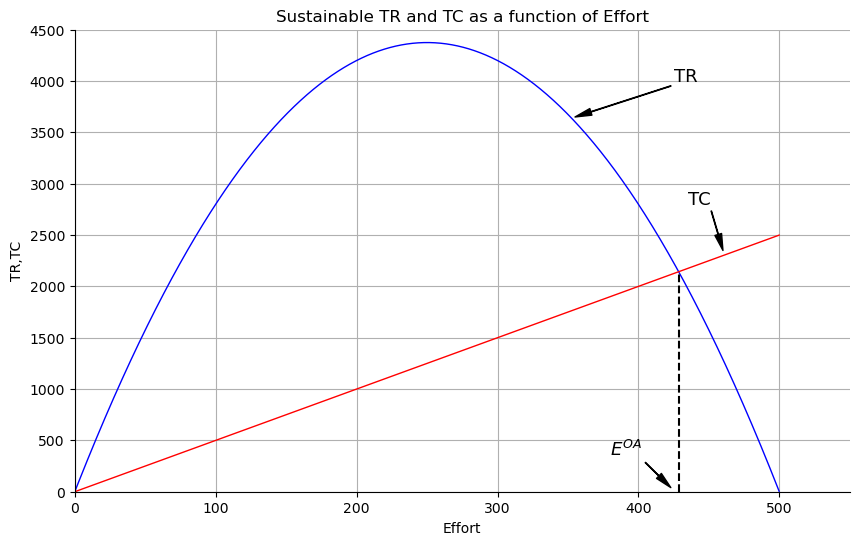

In [15]:
plt.figure(figsize=(10, 6))
plt.subplot(111)
lw = 1
plt.plot(effort_ss,TR_ss,lw=lw, c="b")
plt.plot(effort_ss,TC,lw=lw,c='r')
plt.xlabel("Effort")
plt.ylabel("TR,TC")
plt.title("Sustainable TR and TC as a function of Effort")
plt.annotate('TR', xy=(355, 3650), xytext=(425, 4000),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)
plt.annotate('TC', xy=(460, 2350), xytext=(435, 2800),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)
plt.annotate('$E^{OA}$', xy=(423, 40), xytext=(380, 350),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)
plt.plot((eoa, eoa), (0, c*eoa), 'k--')
plt.xlim(0,550)
plt.ylim(0,4500)
sbn.despine()
plt.grid()

Let's examine how these curves shift with a higher value of $\alpha$:

In [16]:
print("Old alpha is", alpha)
alpha = alpha *1.5
print("New alpha is", alpha)

Old alpha is 0.001
New alpha is 0.0015


For the sake of brevity, we'll condense the steps and perform all calculations in one code-block and won't plot intermediate results.  A couple of things to note:

1. Biological parameters are not affected by the technical change, except via the harvest function.  Since the maximum harvest levels one can sustain at steady state is dictated by the maximum growth rate of the population, maximum total revenues will be unchanged, except that it will now take less effort to achieve.
2. Total costs are not impacted by technical change except by changing optimal effort levels.

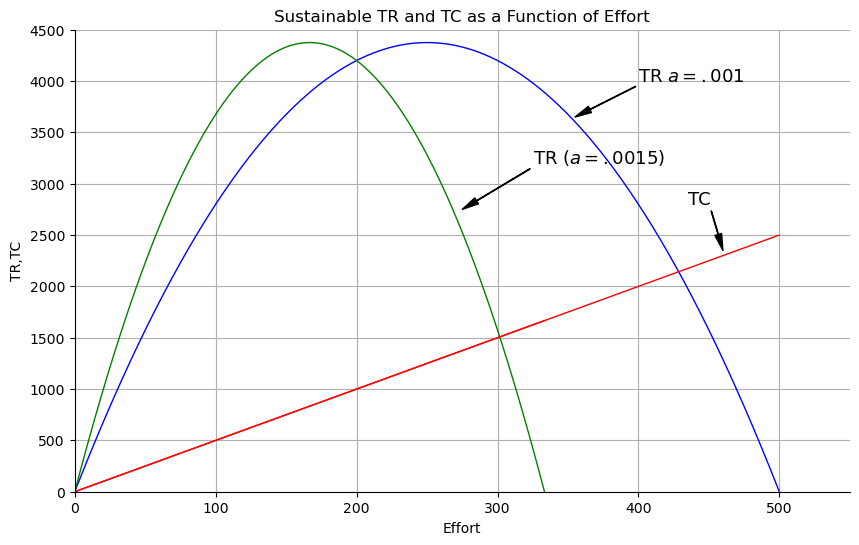

In [17]:
# for each stock size, store steady state effort
effort_ss_tech = (r * S * (1 - S/K))/(alpha*S)
    
TR_ss_tech = dSdt * p
TC_tech = effort_ss_tech * c

plt.figure(figsize=(10, 6))
plt.subplot(111)
lw = 1
plt.plot(effort_ss,TR_ss,lw=lw, c="b")
plt.plot(effort_ss,TC,lw=lw,c='r')

plt.plot(effort_ss_tech,TR_ss_tech,lw=lw, c="g")
plt.plot(effort_ss_tech,TC_tech,lw=lw,c='r')

plt.xlabel("Effort")
plt.ylabel("TR,TC")
plt.title("Sustainable TR and TC as a Function of Effort")
plt.annotate('TR $a = .001$', xy=(355, 3650), xytext=(400, 4000),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)

plt.annotate('TR ($a = .0015$)', xy=(275, 2750), xytext=(325, 3200),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)

plt.annotate('TC', xy=(460, 2350), xytext=(435, 2800),
            arrowprops=dict(facecolor='black',width=.3,headwidth=5),fontsize=13)
plt.xlim(0,550)
plt.ylim(0,4500)
sbn.despine()
plt.grid()

Note that effort goes down even in an open access setting.  The maximum total revenues is unchanged (at approximately \$4500), although it requires less effort after the improvement in technology.  Given our results above, it might be tempting to think that this is a **good** outcome for stocks since we showed the inverse relationship between steady state equilibrium stocks and effort.  Does less effort equate to higher stocks compared to the case where $\alpha=.001$?

To see this we will solve for open access effort levels under the new technology regime and then compare to the original solution with the old technology.

In [18]:
soa_tech = c/(p*alpha)
print("Open Access Equilibrium Stock Size with new technology is", round(soa_tech,2))
print("Open Access Equilibrium Stock Size with old technology was", soa)
eoa_tech = r*soa_tech*(1-(soa_tech/K))/(alpha*soa_tech)
print("Open Access Equilibrium Effort with new technology is", round(eoa_tech,2))
print("Open Access Equilibrium Effort with old technology was", round(eoa,2))
revs_oa_tech = p*alpha*soa_tech*eoa_tech
cost_oa_tech = c*eoa_tech
profits_oa_tech = revs_oa_tech - cost_oa_tech
print("Open Access Equilibrium Profits with new technology is", profits_oa_tech)
print("Open Access Equilibrium Profits with old technology was", profits_oa)
print("\nStocks lowered by %f percent: "% (100*(soa_tech - soa)/soa))

Open Access Equilibrium Stock Size with new technology is 333.33
Open Access Equilibrium Stock Size with old technology was 500.0
Open Access Equilibrium Effort with new technology is 301.59
Open Access Equilibrium Effort with old technology was 428.57
Open Access Equilibrium Profits with new technology is 0.0
Open Access Equilibrium Profits with old technology was 0.0

Stocks lowered by -33.333333 percent: 


The technical change brought **no** change to the economic condition of the fishery (since profits are zero before and after), but lowered stocks considerably.  

What about the condition of the fishery at profit maximizing levels under the new technology?

In [19]:
S_initial_guess = 3000
S_star_tech = fmin(negative_profits, S_initial_guess)
print("Profit Maximizing Steady State Stocks (S*) with new tech are", S_star_tech[0].round(2))
print("Profit Maximizing Steady State Stocks (S*) with old tech are", S_star[0].round(2))
E_star_tech = r*S_star_tech*(1-(S_star_tech/K))/(alpha*S_star_tech)
print("Profit Maximizing Effort (E*) with new tech is", E_star_tech[0].round(2))
print("Profit Maximizing Effort (E*) with old tech is", E_star[0].round(2))
revs_star_tech = p*alpha*S_star_tech*E_star_tech
print("Total Revenues at E* with new tech is", revs_star_tech[0].round(2))
print("Total Revenues at E* with old tech is", revs_star[0].round(2))
cost_star_tech = c*E_star_tech
print("Total Costs at E* with new tech is",cost_star_tech[0].round(2))
print("Total Costs at E* with new tech is",cost_star[0].round(2))
profits_star_tech = revs_star_tech - cost_star_tech
print("Profits at E* with new tech is", profits_star_tech[0].round(2))
print("Profits at E* with old tech is", profits_star[0].round(2))
print("\nStocks lowered by %f percent"% (100*(S_star_tech - S_star)/S_star))

Optimization terminated successfully.
         Current function value: -3581.349206
         Iterations: 26
         Function evaluations: 52
Profit Maximizing Steady State Stocks (S*) with new tech are 1916.67
Profit Maximizing Steady State Stocks (S*) with old tech are 2000.0
Profit Maximizing Effort (E*) with new tech is 150.79
Profit Maximizing Effort (E*) with old tech is 214.29
Total Revenues at E* with new tech is 4335.32
Total Revenues at E* with old tech is 4285.71
Total Costs at E* with new tech is 753.97
Total Costs at E* with new tech is 1071.43
Profits at E* with new tech is 3581.35
Profits at E* with old tech is 3214.29

Stocks lowered by -4.166669 percent


So if we could get to a profit maximizing solution while overcoming the open access problem, profits are higher with the new technology, while effort is decreased.  Furthermore, while stocks decrease the decrease is much smaller than under the Open Access case with a technical change considered above.